 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



optimal path is [[6, 7], [6, 6], [6, 5], [6, 4], [5, 3], [4, 2], [3, 2], [2, 1], [1, 0], [0, 0]]
The optimal distance is 9.0


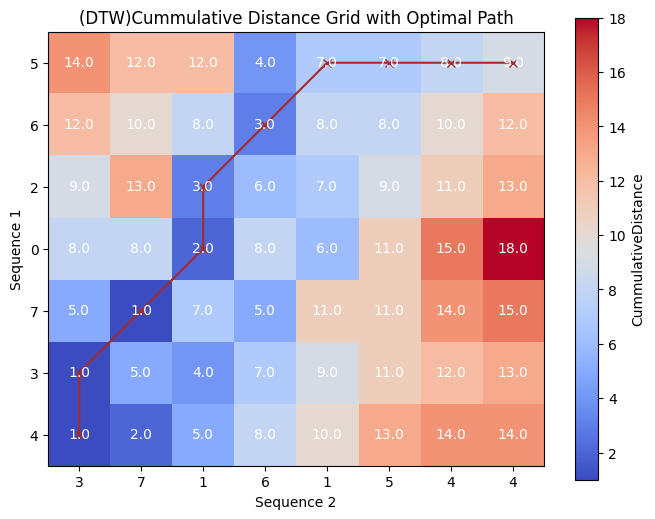

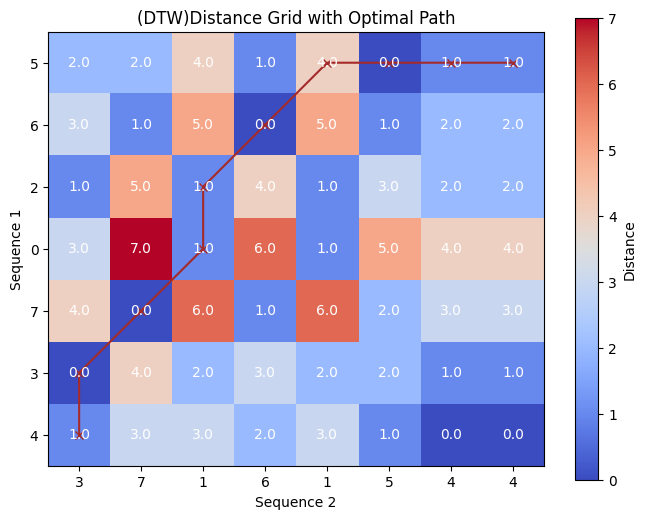

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    m=len(sequence1)
    n=len(sequence2)
    d=np.zeros((m,n))
    for i in range(m):
      for j in range(n):
        d[i][j]=abs(sequence1[i]-sequence2[j])
    c=np.zeros((m,n))
    p=np.zeros((m,n))
    c[0][0]=d[0][0]
    for i in range(1,m):
      c[i,0]=c[i-1,0]+d[i,0]
    for j in range(1,n):
      c[0,j]=c[0,j-1]+d[0,j-1]
    for i in range(1,m):
      for j in range(1,n):
        c[i][j]=d[i][j]+min([c[i-1][j-1],c[i-1][j],c[i][j-1]])
        p[i][j]=np.argmin([c[i-1][j-1],c[i-1][j],c[i][j-1]])
    optimal_path=[]


    i=m-1
    j=n-1
    optimal_path.append([m-1,n-1])
    while i!=0 and j!=0:
      p_curr=p[i][j]
      if(p_curr==0):
        optimal_path.append([i-1,j-1])
        i=i-1
        j=j-1
      elif(p_curr==1):
        optimal_path.append([i-1,j])
        i=i-1
        j=j
      else:
        optimal_path.append([i,j-1])
        i=i
        j=j-1
    optimal_path.append([0,0])
    return c[m-1][n-1],optimal_path,c,d



def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates

    #Obtain the optimal path using "DTW" function

    optimal_distance,path,C,d=DTW(sequence1,sequence2)

    n, m = C.shape

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(8, 6))

    # Plot the cost matrix
    plt.imshow(C, origin='lower', cmap='coolwarm', interpolation='nearest')

    # Highlight the optimal path
    plt.plot([op[1] for op in path], [op[0] for op in path], marker='x', color="brown")


    # Add annotations for each grid cell
    for i in range(n):
        for j in range(m):
            plt.text(j, i, f'{C[i, j]}', ha='center', va='center', color='white')

    # Add labels and grid lines
    plt.colorbar(label='CummulativeDistance')
    plt.title('(DTW)Cummulative Distance Grid with Optimal Path')
    plt.xticks(np.arange(len(sequence2)), sequence2)
    plt.yticks(np.arange(len(sequence1)), sequence1)
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    # plt.grid(color='w', linestyle='-', linewidth=1)
    # Show the plot
    plt.show()

    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Plot the cost matrix
    plt.imshow(d, origin='lower', cmap='coolwarm', interpolation='nearest')

    # Highlight the optimal path
    plt.plot([op[1] for op in path], [op[0] for op in path], marker='x', color="brown")

    # Add annotations for each grid cell
    for i in range(n):
        for j in range(m):
            plt.text(j, i, f'{d[i, j]}', ha='center', va='center', color='white')

    # Add labels and grid lines
    plt.colorbar(label='Distance')
    plt.title('(DTW)Distance Grid with Optimal Path')
    plt.xticks(np.arange(len(sequence2)), sequence2)
    plt.yticks(np.arange(len(sequence1)), sequence1)
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    # plt.grid(color='w', linestyle='-', linewidth=1)
    # Show the plot
    plt.show()

# Example usage
# Create a random cost matrix for demonstration
A=[4,3,7,0,2,6,5]
B=[3,7,1,6,1,5,4,4]


optimal_distance,optimal_path,c,d=DTW(A,B)
print(f'optimal path is {optimal_path}')
print(f"The optimal distance is {optimal_distance}")
plotDTWpath(A,B)


<b> Report your observations </b>

1. We are using L1 norm to compute the distance matrix and further carrying out the calculations. The order of norm can be changed depending upon the nature of the data.

2. In the given example we are getting the optimal distance as 9.0 using L1 norm.

3. Overall computations required by this algorithm is quite large as the DTW has a quadratic time complexity i.e big-Oh(MxN). Therefore th time taken to run this algorithm increases.

4. Finding the shortest cumilative sum/distance from one corner to other is a typical Dijkstra's problem


<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

Link to my voice recordings, Copy this into my drive folder:
https://drive.google.com/drive/folders/1nSsIy9dNnDkTYWUuhozOUm_Sh4trPaRp?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

  Preparing metadata (setup.py) ... done


**Algorithm to perform isolated digit recognition**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    m=sequence1.shape[0]
    n=sequence2.shape[0]
    d=np.zeros((m,n))
    for i in range(m):
      for j in range(n):
        d[i][j]=np.mean(np.abs(sequence1[i]-sequence2[j]))
    c=np.zeros((m,n))
    p=np.zeros((m,n))
    c[0][0]=d[0][0]
    for i in range(1,m):
      c[i,0]=c[i-1,0]+d[i,0]
    for j in range(1,n):
      c[0,j]=c[0,j-1]+d[0,j-1]
    for i in range(1,m):
      for j in range(1,n):
        c[i][j]=d[i][j]+min([c[i-1][j-1],c[i-1][j],c[i][j-1]])
        p[i][j]=np.argmin([c[i-1][j-1],c[i-1][j],c[i][j-1]])
    optimal_path=[]

    i=m-1
    j=n-1
    optimal_path.append([m-1,n-1])
    while i!=0 and j!=0:
      p_curr=p[i][j]
      if(p_curr==0):
        optimal_path.append([i-1,j-1])
        i=i-1
        j=j-1
      elif(p_curr==1):
        optimal_path.append([i-1,j])
        i=i-1
        j=j
      else:
        optimal_path.append([i,j-1])
        i=i
        j=j-1
    optimal_path.append([0,0])
    return c[m-1][n-1],optimal_path,c,d


def plotvectorDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates

    #Obtain the optimal path using "DTW" function

    optimal_distance,path,C,d=vectorDTW(sequence1,sequence2)

    n, m  = C.shape

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(8, 8))

    # Plot the cost matrix
    plt.imshow(C, origin='lower', cmap='coolwarm', interpolation='nearest')

    # Highlight the optimal path
    plt.plot([op[1] for op in path], [op[0] for op in path], marker='.', color="brown")


    # Add annotations for each grid cell

    # plt.text(j, i, f'{C[i, j]}', ha='center', va='center', color='white')
    plt.text(0, 0, f'{C[0, 0]:.2f}', ha='left', va='bottom',  color='black')
    plt.text(n-1, m-1, f'{C[m-1, n-1]:.2f}',ha='right', va='top', color='black')

    # Add labels and grid lines
    plt.colorbar(label='CummulativeDistance')
    plt.title('(DTW)Cummulative Distance Grid with Optimal Path')
    # plt.xticks(np.arange(len(sequence2)), sequence2)
    # plt.yticks(np.arange(len(sequence1)), sequence1)
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    # plt.grid(color='w', linestyle='-', linewidth=1)
    # Show the plot
    plt.show()

    # Create a new figure
    plt.figure(figsize=(8, 8))

    # Plot the cost matrix
    plt.imshow(d, origin='lower', cmap='coolwarm', interpolation='nearest')

    # Highlight the optimal path
    plt.plot([op[1] for op in path], [op[0] for op in path], marker='.', color="brown")

    # Add labels and grid lines
    plt.colorbar(label='Distance')
    plt.title('(DTW)Distance Grid with Optimal Path')
    # plt.xticks(np.arange(len(sequence2)), sequence2)
    # plt.yticks(np.arange(len(sequence1)), sequence1)
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    # plt.grid(color='w', linestyle='-', linewidth=1)
    # Show the plot
    plt.show()




In [ ]:
traudios=[]
for i in range(10):
  path='/content/drive/MyDrive/varunrecordings/'
  wavefile=path+str(i)+'_varun_'+str(0)+'.wav'
  (rate,sig) = wav.read(wavefile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  traudios.append(np.array(mfcc_feat_cmvn))

In [ ]:
teaudios=[]
tetargets=[]
for i in range(10):
  for j in range(3):
    path='/content/drive/MyDrive/varunrecordings/'
    wavefile=path+str(i)+'_varun_'+str(j+1)+'.wav'
    (rate,sig) = wav.read(wavefile)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    teaudios.append(np.array(mfcc_feat_cmvn))
    tetargets.append(i)

Same digit optimal distance : 2282.955915927887


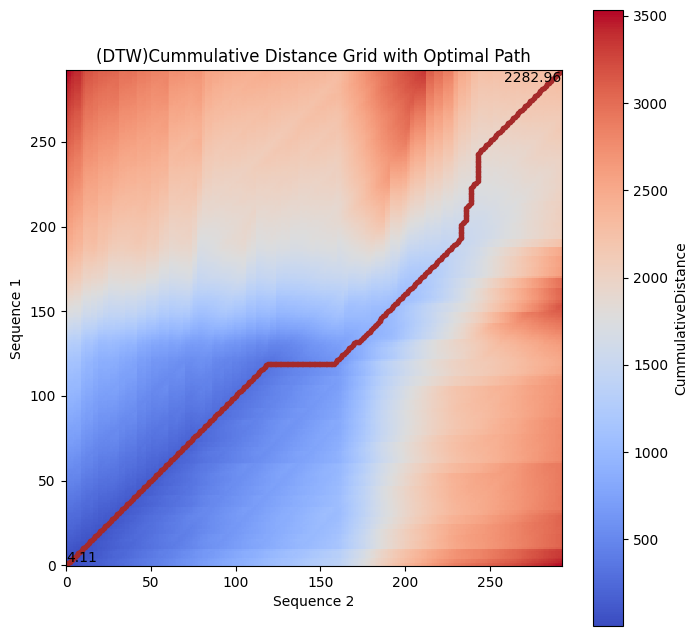

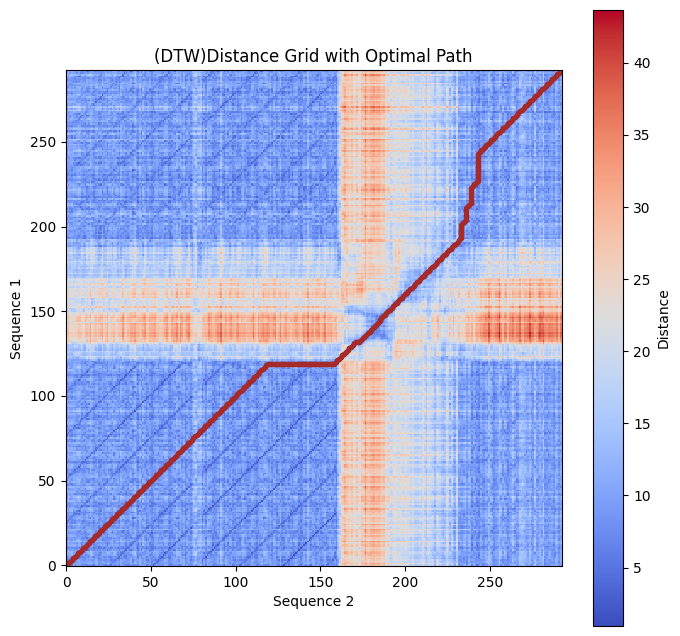

Different digit optimal distance : 2569.5754367113113


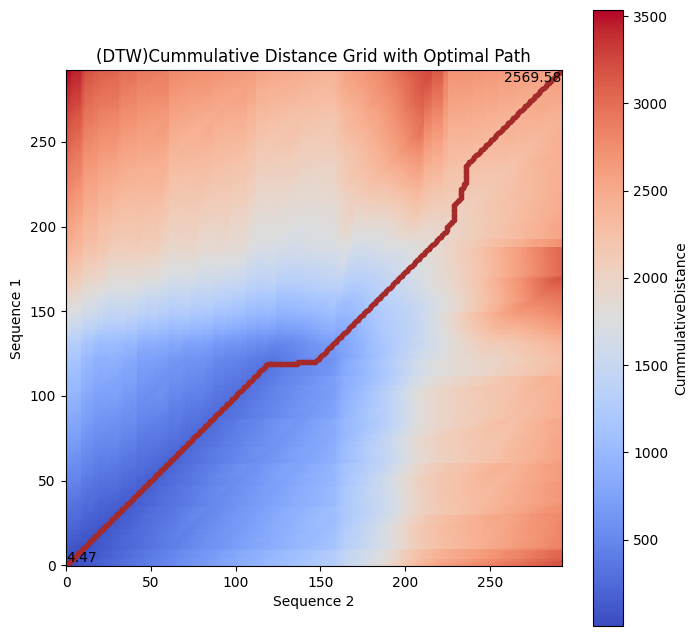

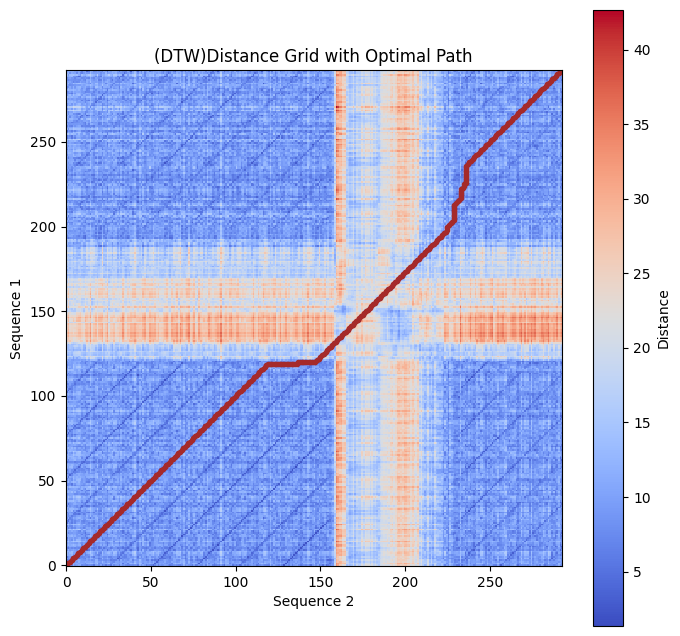

In [ ]:
opt_dis,_,_,_=vectorDTW(traudios[0],teaudios[0])
print(f'Same digit optimal distance : {opt_dis}')
plotvectorDTWpath(traudios[0],teaudios[0])

opt_dis,_,_,_=vectorDTW(traudios[0],teaudios[29])
print(f'Different digit optimal distance : {opt_dis}')
plotvectorDTWpath(traudios[0],teaudios[29])

**Plot the optimal DTW path**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


def isolated_digit(traudios,teaudios,tetargets):
  pretargets=[]
  confusionmatrix=np.zeros((10,10))
  for i in range(len(teaudios)):
    dmin=1000000
    guess=13
    for j in range(10):
      d,_,_,_=vectorDTW(traudios[j],teaudios[i])
      if d<dmin:
        dmin=d
        guess=j
    pretargets.append(guess)
    confusionmatrix[guess,tetargets[i]]+=1
  return pretargets,confusionmatrix


def calcacc(pretargets,tetargets):
  count=0
  for i in range(len(pretargets)):
    if(pretargets[i]==tetargets[i]):
      count+=1
  return count/len(pretargets)

pretargets,confusionmatrix=isolated_digit(traudios,teaudios,tetargets)

count=0
for i in range(len(pretargets)):
  if(pretargets[i]==tetargets[i]):
    count+=1
print(f"Accuracy is : {count/len(pretargets)*100} % ")
print(confusionmatrix)




Accuracy is : 90.0 % 
[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]]


**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

<b> Report your observations </b>

1. The number of computations is even more as now each feature at a specific time is represented by a vector and not a single number.

2. We are achieving around 90% accuracy while using my voice against the test cases of my own voice which s pretty good.

3. We are assigning the sample to the number corresponding to which the optimal distance is minimum.

4. We can observe that when DTW is applied on the same digit recordings, The optimal distance between them is low compared to when DTW is run on different digit recordings.

5. It can be observed from the confusion matrix, that 8 and 7 are the most misinterpreted digits by the model. 8 is predicted as 3 and 5 incorrectly whereas 7 is misinterpreted as 9. This may be due to similarity in the sound signals of the mispredicted values.

6. It can be observed that the path deviates from the straight line as soon as the voices start, whereas during the other time it is just a straight line with slope 1.

7. This proves that the DTW alg can be used to recorgnise a same person's voice.



<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:

import numpy as np


def convertto(wavefile):
  (rate,sig) = wav.read(wavefile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return np.array(mfcc_feat_cmvn)
#Performance evaluation of Isolated digit recognition system on TDIGITS data

speakers=['jackson','nicolas','theo','yweweler']
path='/content/drive/MyDrive/MultiSpeakerDigitData_modified/'

for speaker in speakers:
  te_data=[]
  tr_data=[]
  te_targets=[]
  npi=path+speaker+'/'
  for i in range(10):
    npp='/content/drive/MyDrive/varunrecordings/'+str(i)+'_varun_0.wav'
    # print(npp)
    # wv=Audio(npp)
    # display(wv)
    tr_data.append(convertto(npp))
    for j in range(50):
          npp=npi+str(i)+'_'+speaker+'_'+str(j)+'.wav'
          te_data.append(convertto(npp))
          te_targets.append(i)
  # Assign the above properly
  pretargets,conf=isolated_digit(tr_data,te_data,te_targets)
  print(f"The accuracy for speaker {speaker} with my recordings is : {calcacc(pretargets,te_targets)*100} %")
  print(conf)


#Suggest some of the changes to improve the system performance.









The accuracy for speaker jackson with my recordings is : 6.0 %
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  3.  2.  0.  4.  0.  1.  0.  4.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [21. 22. 30. 34. 17. 12. 27. 14. 31. 30.]
 [26. 20. 10. 12. 29. 38. 10. 30. 13. 10.]
 [ 1.  4.  8.  4.  0.  0. 12.  5.  1.  2.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
The accuracy for speaker nicolas with my recordings is : 9.0 %
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  1.  9.  1.  2.  0.]
 [ 1.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  4.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [36. 42. 32. 28. 31.  7. 16. 20.  5. 40.]
 [ 6.  6. 13.  8. 18. 40. 10.  9. 37. 10.]
 [ 6.  0.  3.  6.  1.  1.  1. 19.  0.  0.]
 [ 0.  0.  0.  8.  0.  1. 10.  1.  5.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
The accuracy

In [ ]:
speakers=['jackson','nicolas','theo','yweweler']

path='/content/drive/MyDrive/MultiSpeakerDigitData_modified/'



#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker

for speaker in speakers:
  te_data=[]
  tr_data=[]
  te_targets=[]
  npi=path+speaker+'/'
  for i in range(10):
    npp=npi+str(i)+'_'+speaker+'_'+'0.wav'
    # print(npp)
    # wv=Audio(npp)
    # display(wv)

    tr_data.append(convertto(npp))
    for j in range(50):
          npp=npi+str(i)+'_'+speaker+'_'+str(j)+'.wav'
          te_data.append(convertto(npp))
          te_targets.append(i)
  # Assign the above properly
  pretargets,conf=isolated_digit(tr_data,te_data,te_targets)
  print(f"The accuracy for speaker {speaker} with his own recordings is : {calcacc(pretargets,te_targets)*100} %")
  print(conf)

The accuracy for speaker jackson with his own recordings is : 85.0 %
[[50.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 43.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0. 49.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 42.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 48.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  5.  0. 50.  5.  8.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  7.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0. 16. 40.  0.  0.]
 [ 0.  6.  1.  0.  2.  0. 21.  2. 50.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0. 46.]]
The accuracy for speaker nicolas with his own recordings is : 76.6 %
[[38.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 33.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 29.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  3. 17.  0.  0.  0.  0.  0.  2.]
 [ 9. 17.  9.  0. 49.  0.  0.  5.  0.  0.]
 [ 0.  0.  0.  0.  0. 50.  0.  0.  0.  8.]
 [ 1.  0.  5. 15.  0.  0. 41.  2.  2.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. 39.  0.  0.]
 [ 0.  0.  4. 17.  1.  0.  8.  4. 48.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 39.]]


In [ ]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
path='/content/drive/MyDrive/MultiSpeakerDigitData_modified/'
speakers=speakers[1:]
for speaker in speakers:
  te_data=[]
  tr_data=[]
  te_targets=[]
  npi=path+speaker+'/'
  for i in range(10):
    npp='/content/drive/MyDrive/MultiSpeakerDigitData_modified/jackson/'+str(i)+'_jackson_0.wav'
    # print(npp)
    # wv=Audio(npp)
    # display(wv)
    tr_data.append(convertto(npp))
    for j in range(50):
          npp=npi+str(i)+'_'+speaker+'_'+str(j)+'.wav'
          te_data.append(convertto(npp))
          te_targets.append(i)
  # Assign the above properly
  pretargets,conf=isolated_digit(tr_data,te_data,te_targets)
  print(f"The accuracy for speaker {speaker} with jackson recordings is : {calcacc(pretargets,te_targets)*100} %")
  print(conf)

The accuracy for speaker nicolas with jackson recordings is : 20.0 %
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [17.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 23.  0.  4.  1. 50.  2.  6.  0. 42.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  3.  0.  0.  0.  0.  0.  4.]
 [32. 27. 49. 43. 49.  0. 48. 44. 50.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
The accuracy for speaker theo with jackson recordings is : 32.6 %
[[ 7.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 7.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 25.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0. 16.  0.  6.  0. 49.  4. 24.  1. 19.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  2.  0.  0.  0. 14.  0. 22.]
 [35. 33. 40. 17. 45.  1. 46. 11. 49.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]
The

<b> Report your observations </b>

1. We can observe that the performance of the model on using my voice as the training for the TDIGITS dataset is quite low around 10-15%.

2. This is due to different pronunciations of the speakers and finite training set due to which the model is unable to align the signals properly.

3. Morover the background noise also hampers the performance and leads to errors in computing the distance matrix which ultimately leads to wrong optimal distance calculations.

4. Whereas as we test the model on the same speaker, We get higher accuracies as the pronunciations are quite similar and the model can predict better.

5. When we train the model based on one speaker and test it on other speakers in the TDIGITS datasets, we are getting quite low accuracies as expected

<b> Changes that can be made to improve the model's performance </b>

1. Implement some preprocessing techniques in order to remove the background noise.

2. Improve the signal to noise ratio by amplifying certain parts of the signal.

3. Include more training data with variations in digit pronunciations.

4. Capture more relevant information from the audio signals by enhancing the feature extraction processes.

5. Combine this DTW model with Neural networks/HMMs to get an even better performance.
